 # "Building Energy Savings Guide: Spotting Best Upgrade Opportunities"

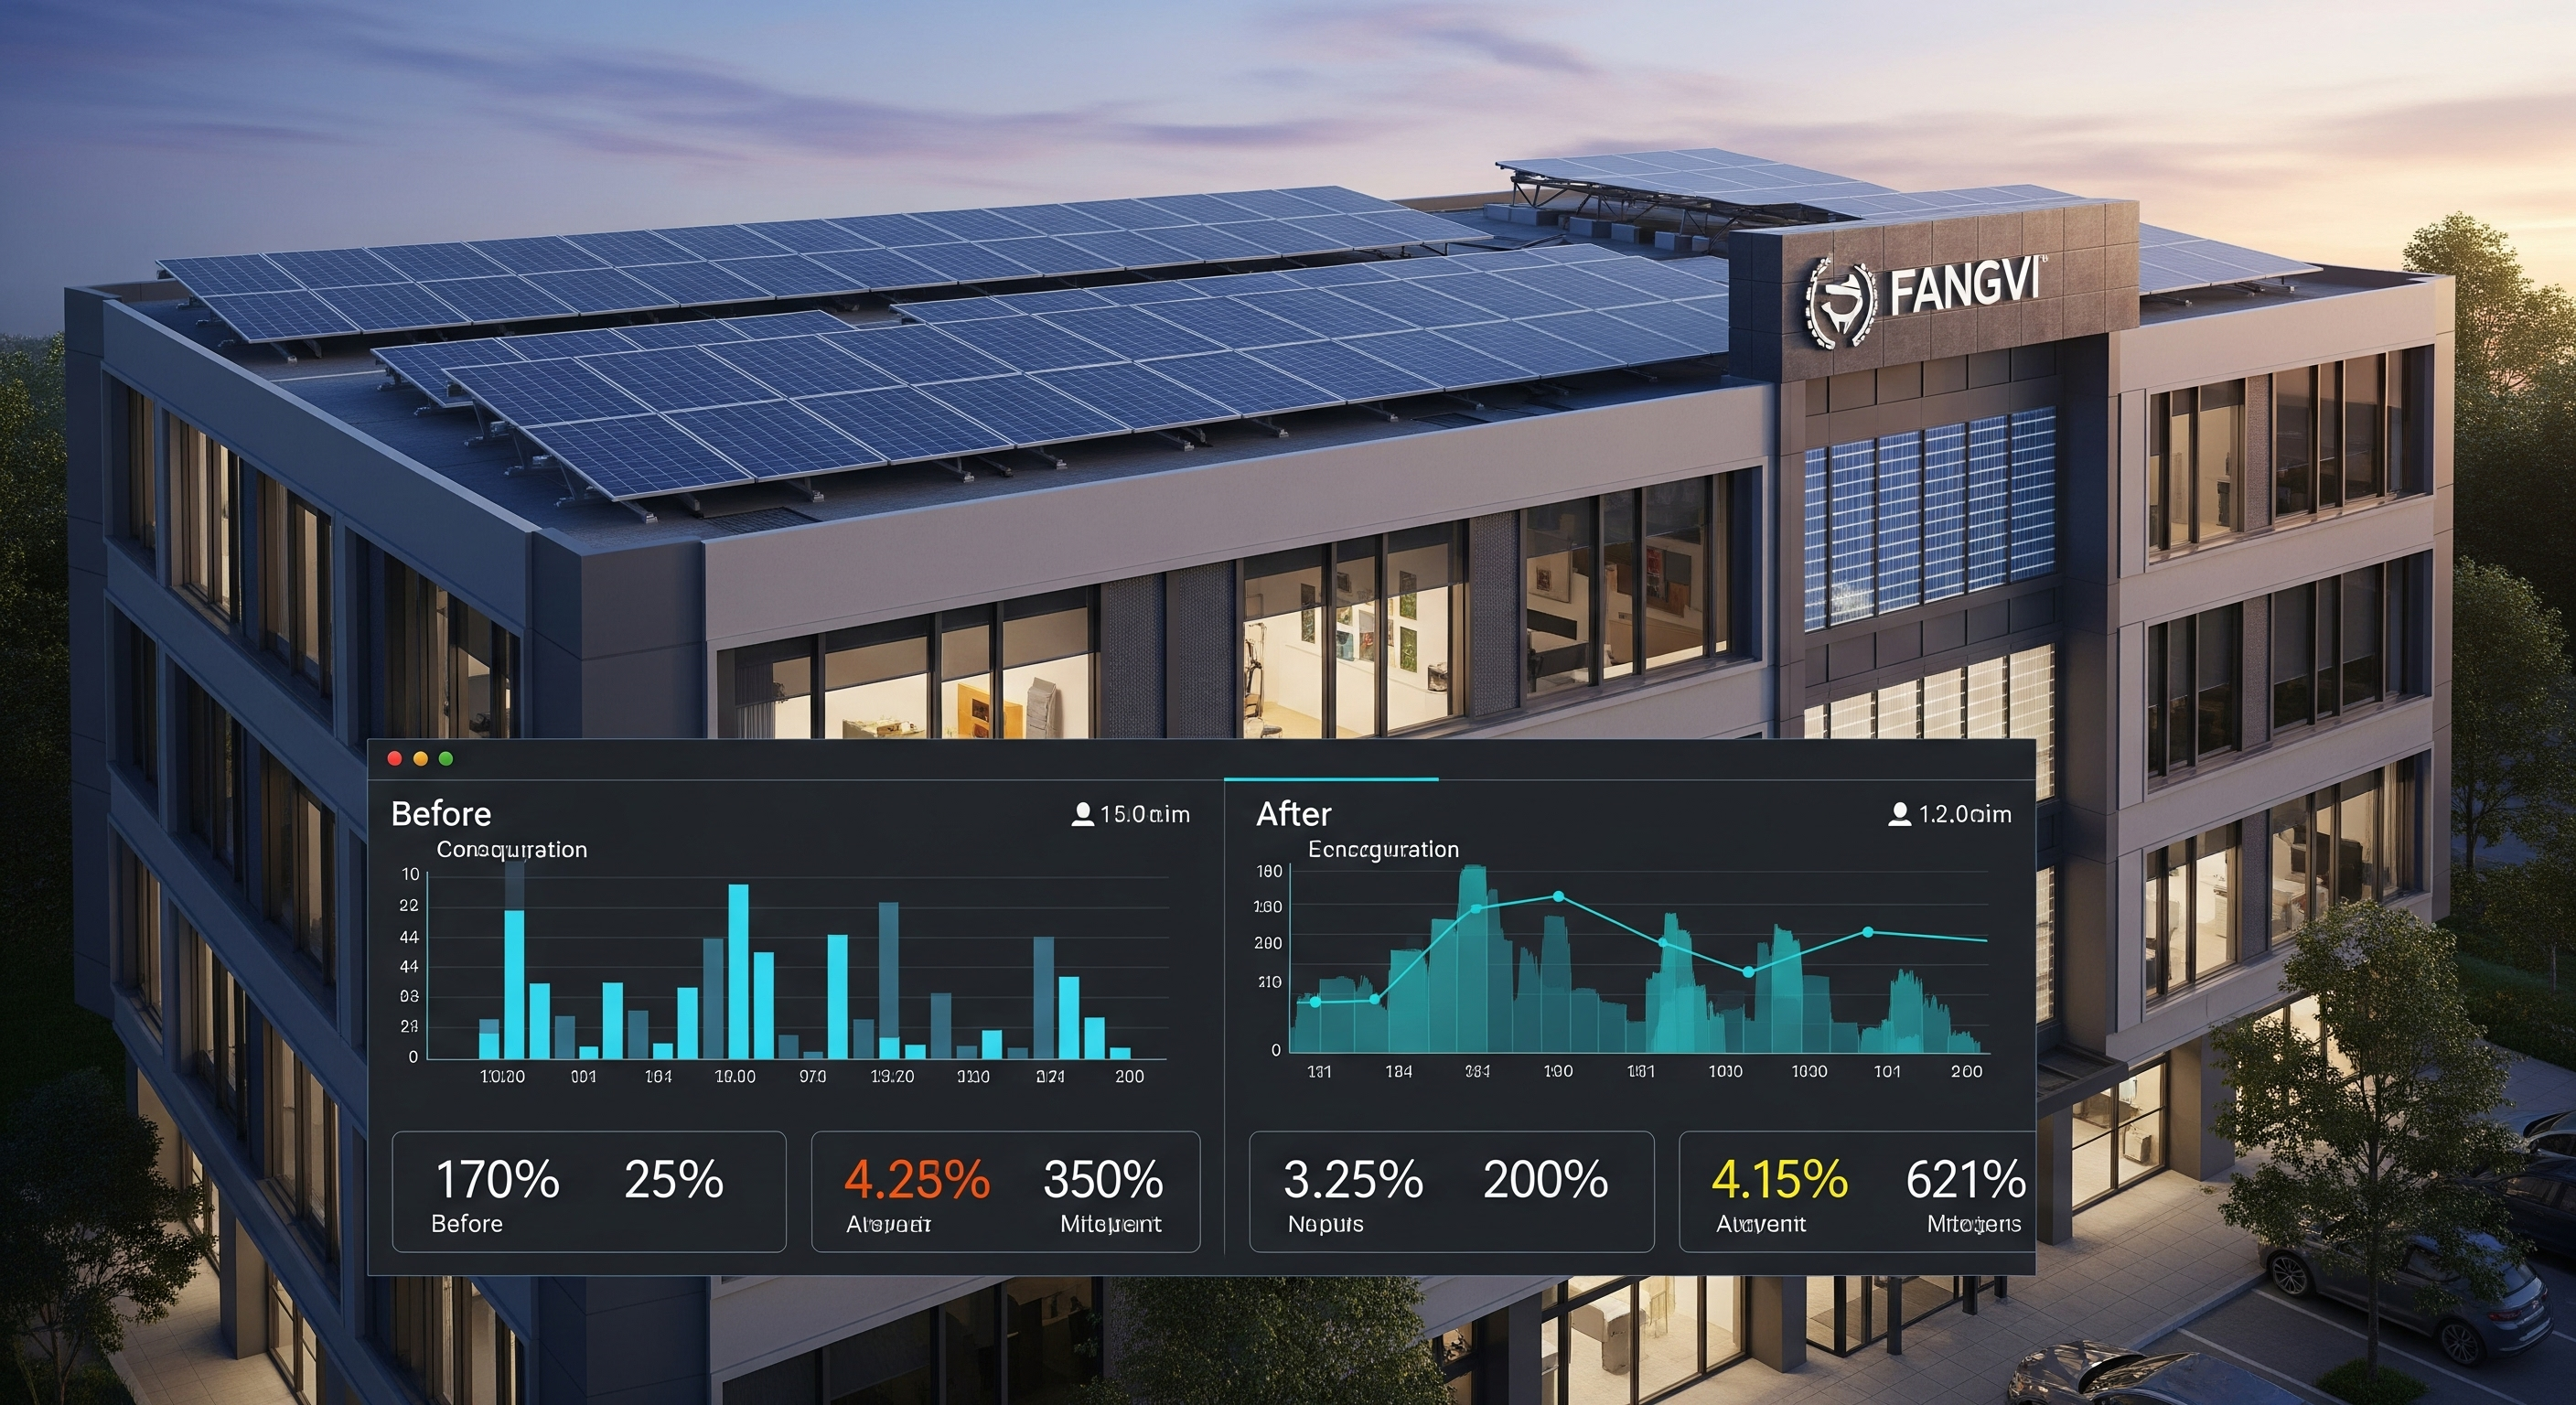
## Project Overview

This project aims to leverage the U.S. Energy Information Administration's (EIA) Commercial Buildings Energy Consumption Survey (CBECS) 2018 dataset to identify commercial buildings with significant, targeted energy efficiency retrofit potential. Unlike traditional energy consumption prediction or general benchmarking, this project focuses on pinpointing specific end-uses (e.g., heating, cooling, lighting) where a building's energy consumption is disproportionately high compared to similar buildings, indicating a clear opportunity for specific interventions.

## Problem Statement

In order to determine where energy efficiency improvements are most needed, how can we use the CBECS dataset to identify commercial buildings that consume particularly high amounts of energy in particular areas (such as lighting, heating, or cooling) when compared to similar buildings?

## Motivation

Finding buildings that can increase their energy efficiency is essential for lowering overall energy use, operating expenses, and environmental effect. Present methods frequently concentrate on wide benchmarking or overall energy consumption intensity (EUI). A building may, however, have an average EUI but be extremely inefficient in one area (such as old lighting systems) and extremely efficient in another. By identifying particular areas of inefficiency, this research aims to deliver more detailed, actionable information that will enable more focused and successful retrofit efforts.

## Dataset

* **Name:** Commercial Buildings Energy Consumption Survey (CBECS) 2018
* **Source:** U.S. Energy Information Administration (EIA)
* **Description:** A national sample survey that collects information on the stock of U.S. commercial buildings, their energy use, and expenditures. It includes detailed data on building characteristics, operational features, and energy consumption broken down by end-use (e.g., space heating, space cooling, lighting, refrigeration).
* **Availability:** [EIA CBECS Data](https://www.eia.gov/consumption/commercial/data/2018/)

## Methodology (High-Level Plan)

1.  **Data Acquisition & Loading:** Download and load the CBECS 2018 public-use microdata file.
2.  **Exploratory Data Analysis (EDA):**
    * Understand the structure, variable types, and distributions.
    * Identify and handle missing values and outliers (e.g., `-2` and `-9` codes for 'Not Applicable'/'Don't Know').
3.  **Feature Engineering:**
    * Create a "peer group" definition based on key characteristics (e.g., building type, climate zone, size range, operational hours).
    * For each major energy end-use (e.g., `BTUELSPH` for electricity space heating, `BTUELCOL` for cooling, `BTUELLGT` for lighting), calculate a "disproportionate consumption" metric. This might involve:
        * Comparing a building's end-use consumption to the median/mean of its peer group.
        * Calculating a Z-score or percentile rank within its peer group.
        * Defining a threshold (e.g., consumption in the top 20% of its peer group for that specific end-use).
    * Define the **dependent variable**: Classify buildings into categories like "High Heating Efficiency Potential," "High Cooling Efficiency Potential," "High Lighting Efficiency Potential," or "Low Overall Efficiency Potential" based on these disproportionate metrics. This could be a multi-label classification problem.
4.  **Feature Selection:** Select relevant independent variables that influence end-use consumption (e.g., building age, square footage, specific equipment types, climate data, operational hours, principal building activity).
5.  **Model Selection:**
    * Explore various classification models (e.g., Logistic Regression, Random Forest, Gradient Boosting Machines like LightGBM/XGBoost).
    * Consider multi-label classification approaches if a building can have multiple areas of high potential.
6.  **Model Training & Evaluation:**
    * Split data into training and testing sets.
    * Train selected models.
    * Evaluate model performance using appropriate metrics (e.g., Precision, Recall, F1-score, ROC-AUC for each end-use class).
7.  **Interpretation & Insights:** Analyze model outputs to understand which features drive disproportionate consumption in specific end-uses, providing actionable insights for targeted retrofits.

## Key Variables of Interest (Examples)

* **Dependent Variables (Target):**
    * `Heating_Retrofit_Potential` (e.g., High/Low)
    * `Cooling_Retrofit_Potential` (e.g., High/Low)
    * `Lighting_Retrofit_Potential` (e.g., High/Low)
    * *(Derived from `BTUELSPH`, `BTUELCOL`, `BTUELLGT`, etc. relative to peer groups)*
* **Independent Variables (Features):**
    * `PBA` (Principal Building Activity)
    * `SQFT` (Square Footage)
    * `YEARCON` (Year of Construction)
    * `WKHRS` (Weekly operating hours)
    * `EMP_TOT` (Total Employees)
    * `CDD65` / `HDD65` (Cooling/Heating Degree Days for climate context)
    * `EQUIPM` (Main Heating Equipment Type)
    * `ACEQUIPM` (Main Cooling Equipment Type)
    * `LGTINLED` (Presence of LED indoor lighting)
    * ... and many other structural and operational variables from CBECS.

